In [1]:
%pip install matplotlib
%pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 4.1 MB/s eta 0:00:00


## 10.5

#### - Alunos: Antonio Roberto, Aryelson Gonçalves

### Compensador de avanço de fase do Exemplo 10.4 e plotar a resposta ao degrau

Desired pole: -4.000+9.165j
Compensator pole: -10.6
Gain K: 2.9


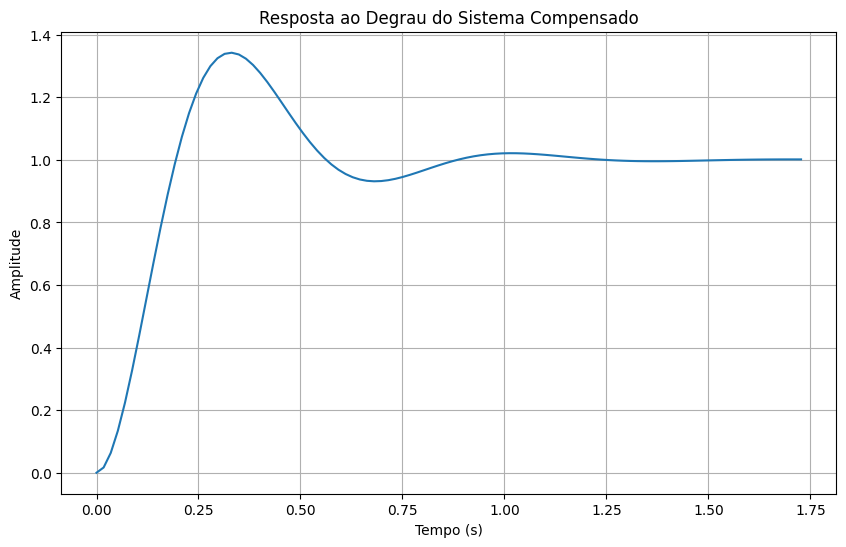

Kv: nan
Phase Margin: 38.5°


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K = 1
G = ct.tf([40], [1, 2, 0])

zeta = 0.4
ts = 1
sigma = 4
wn = sigma/zeta

desired_pole = -sigma + 1j*wn*np.sqrt(1 - zeta**2)
print(f"Desired pole: {desired_pole:.3f}")

z = 4
s = desired_pole

angle_G = np.angle(40/(s*(s + 2)), deg=True)
angle_deficit = 180 - angle_G - np.angle(s + z, deg=True)

theta = np.deg2rad(angle_deficit)
p = sigma - (np.imag(s)/np.tan(theta))
print(f"Compensator pole: {-p:.1f}")

Gc = ct.tf([1, z], [1, p])

K = (np.abs(s) * np.abs(s + 2) * np.abs(s + p)) / (40 * np.abs(s + z))
print(f"Gain K: {K:.1f}")

L = Gc * G * K
T = ct.feedback(L, 1)

t, y = ct.step_response(T)
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema Compensado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Kv = ct.dcgain(L * ct.tf([1, 0], [1]))
print(f"Kv: {Kv:.1f}")

gm, pm, sm, pc, wc, sm_freq = ct.stability_margins(L)
print(f"Phase Margin: {pm:.1f}°")

## 10.7

### Projeto de um compensador de atraso de fase

Polo dominante desejado: -1.000+1.985j

Ganho K não compensado: 4.9
Kv não compensado: 2.5

Fator de correção necessário α = 8.1

Compensador: Gc(s) = (s + 0.1000)/(s + 0.0123)

Kv compensado: nan


/usr/local/lib/python3.11/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


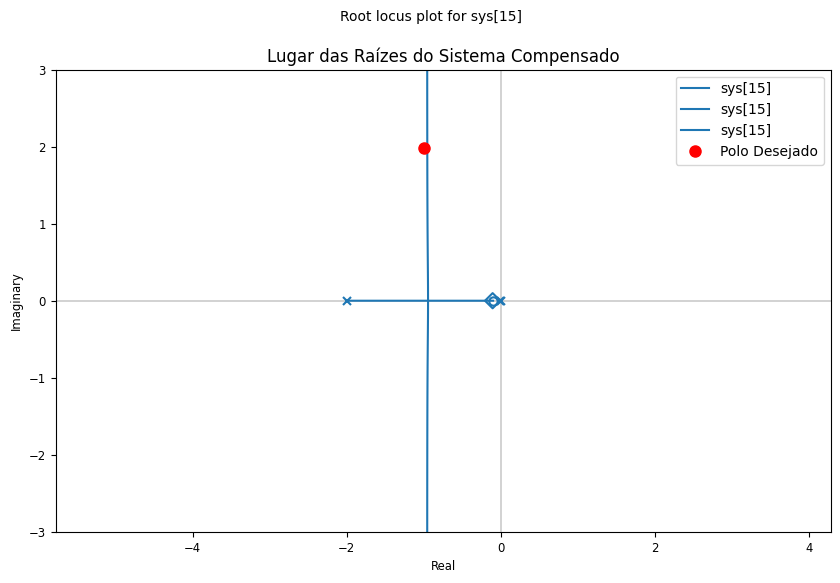

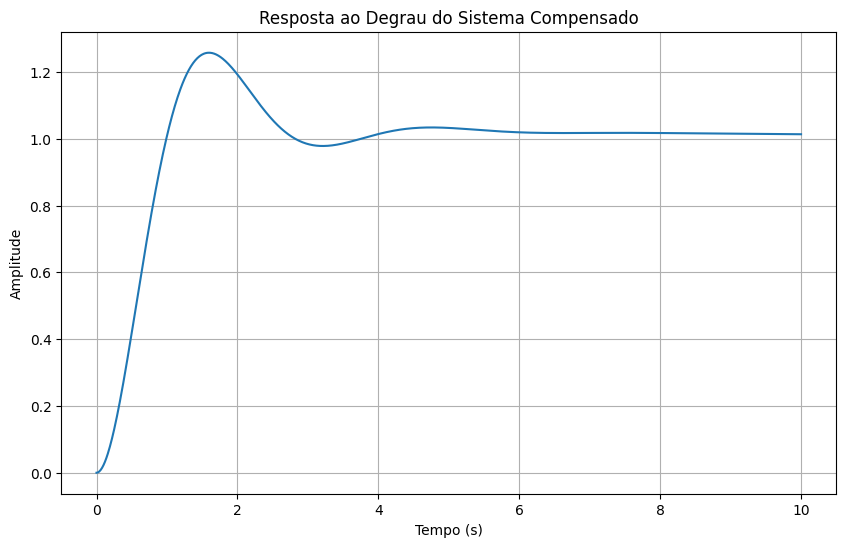

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

num = [1]
den = [1, 2, 0]
G = ct.tf(num, den)

zeta = 0.45
Kv_desired = 20
sigma = 1.0

omega_n = sigma/zeta
desired_pole = -sigma + 1j*omega_n*np.sqrt(1 - zeta**2)
print(f"Polo dominante desejado: {desired_pole:.3f}")

s = desired_pole
K = np.abs(s * (s + 2))
print(f"\nGanho K não compensado: {K:.1f}")

Kv_uncomp = K/2
print(f"Kv não compensado: {Kv_uncomp:.1f}")

alpha = Kv_desired/Kv_uncomp
print(f"\nFator de correção necessário α = {alpha:.1f}")

z = 0.1
p = z/alpha
print(f"\nCompensador: Gc(s) = (s + {z:.4f})/(s + {p:.4f})")

Gc = ct.tf([1, z], [1, p])

L = Gc * G * K
T = ct.feedback(L, 1)

Kv_comp = ct.dcgain(L * ct.tf([1, 0], [1]))
print(f"\nKv compensado: {Kv_comp:.1f}")

plt.figure(figsize=(10, 6))
ct.root_locus(L, grid=False, plot=True)
plt.plot(np.real(desired_pole), np.imag(desired_pole), 'ro',
         markersize=8, label='Polo Desejado')
plt.title('Lugar das Raízes do Sistema Compensado')
plt.legend()
plt.xlim([-2, 0.5])
plt.ylim([-3, 3])
plt.show()

t, y = ct.step_response(T, T=np.linspace(0, 10, 1000))
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema Compensado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## 10.8

### Compensador de atraso de fase usando o diagrama de Bode para o Exemplo 10.8

/tmp/ipython-input-4-1290121833.py:10: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  mag_uncomp, phase_uncomp, omega_uncomp = ct.bode_plot(
/usr/local/lib/python3.11/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/tmp/ipython-input-4-1290121833.py:39: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  ct.bode_plot(L_comp, dB=True, Hz=False, margins=True, label='Compensado', linestyle='--')


Fator de atenuação α: 0.4
Compensador: Gc(s) = (s + 0.17)/(s + 0.480)

Margem de Fase Compensada: 12.4°
Kv Compensado: nan


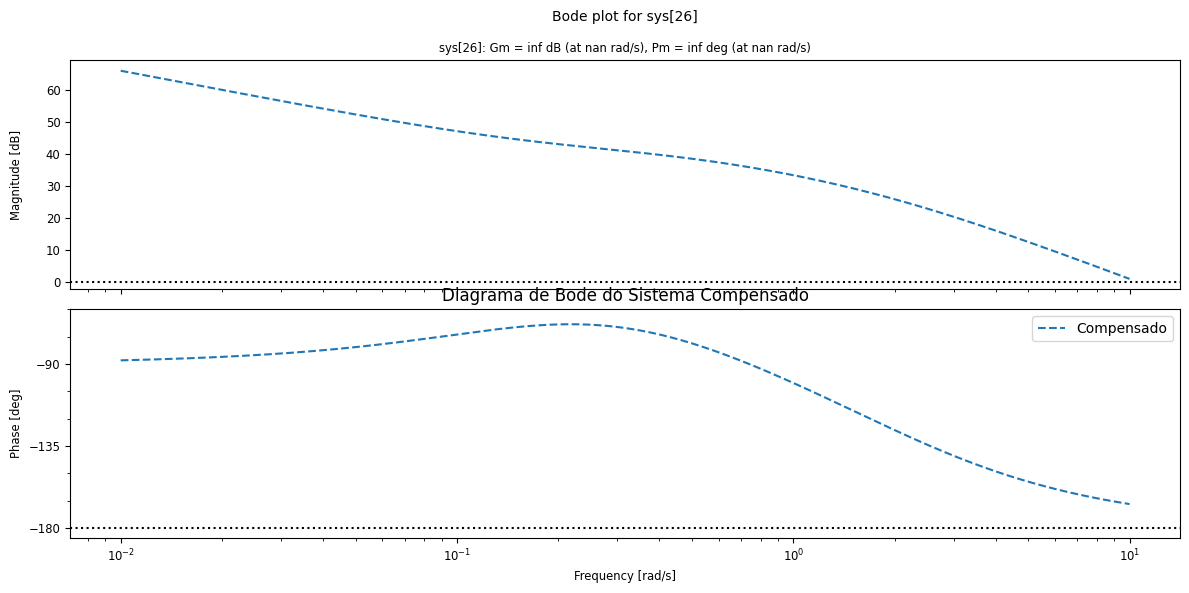

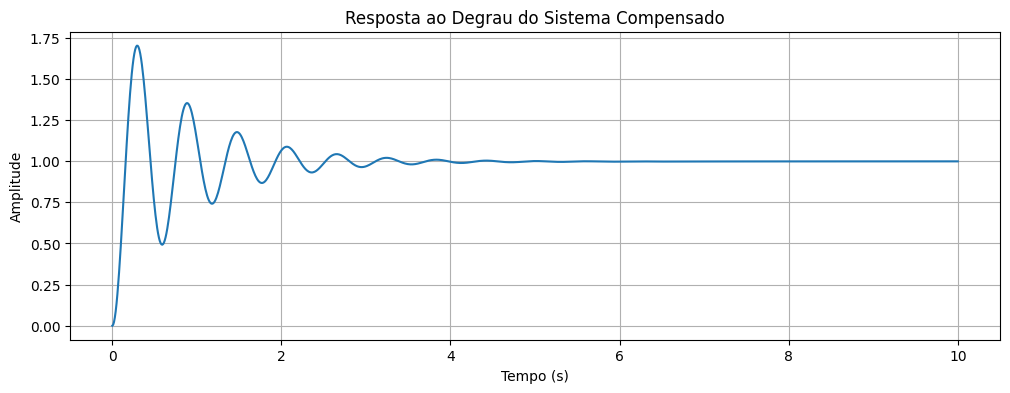

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K_uncomp = 40
num_uncomp = [K_uncomp]
den_uncomp = [1, 2, 0]
G_uncomp = ct.tf(num_uncomp, den_uncomp)

mag_uncomp, phase_uncomp, omega_uncomp = ct.bode_plot(
    G_uncomp, dB=True, Hz=False, margins=True, label='Não Compensado', plot=False
)

target_phase = -130
phase_deg = np.rad2deg(phase_uncomp)
idx = np.argmin(np.abs(phase_deg - target_phase))
vc = omega_uncomp[idx]

mag_at_vc = mag_uncomp[idx]
alpha = 10 ** (-mag_at_vc / 20)
print(f"Fator de atenuação α: {alpha:.1f}")

z = vc / 10
p = z / alpha
print(f"Compensador: Gc(s) = (s + {z:.2f})/(s + {p:.3f})")

Gc = ct.tf([1, z], [1, p]) * (1/alpha)

L_comp = Gc * G_uncomp
T_comp = ct.feedback(L_comp, 1)

gm, pm, sm, pc, wc, sm_freq = ct.stability_margins(L_comp)
Kv_comp = ct.dcgain(L_comp * ct.tf([1, 0], [1]))

print(f"\nMargem de Fase Compensada: {pm:.1f}°")
print(f"Kv Compensado: {Kv_comp:.1f}")

plt.figure(figsize=(12, 6))
ct.bode_plot(L_comp, dB=True, Hz=False, margins=True, label='Compensado', linestyle='--')
plt.legend()
plt.title('Diagrama de Bode do Sistema Compensado')
plt.show()

t, y = ct.step_response(T_comp, T=np.linspace(0, 10, 1000))
plt.figure(figsize=(12, 4))
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema Compensado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Compensador de atraso de fase usando o diagrama de Bode para o Exemplo 10.9

/tmp/ipython-input-5-175133600.py:10: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  mag_uncomp, phase_uncomp, omega_uncomp = ct.bode_plot(
/usr/local/lib/python3.11/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/tmp/ipython-input-5-175133600.py:40: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  ct.bode_plot(L_comp, dB=True, Hz=False, margins=True, label='Compensado', linestyle='--')


Fator de atenuação α: 0.2
Compensador: Gc(s) = (s + 0.13)/(s + 0.734)

Margem de Fase Compensada: -37.1°
Kv Compensado: nan


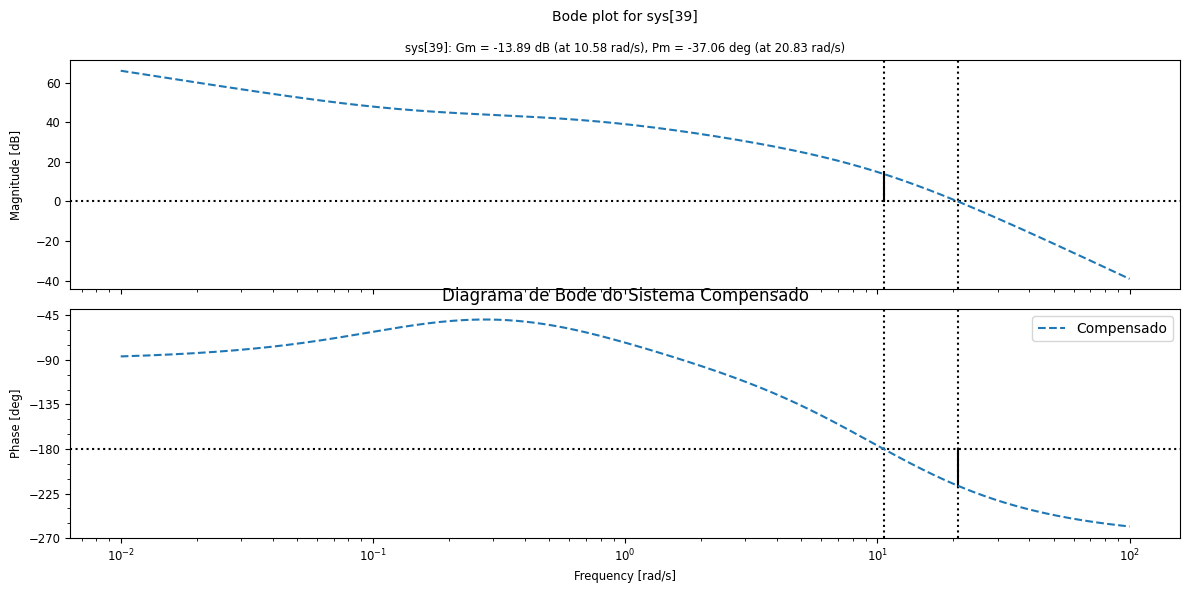

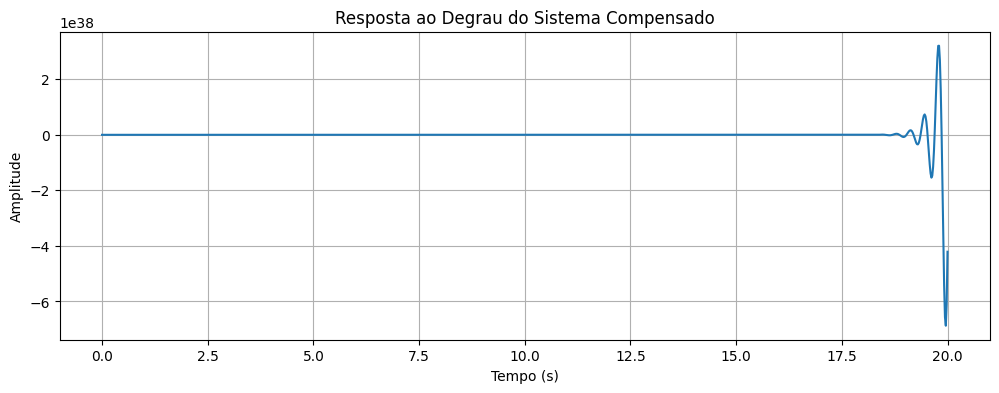

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K_uncomp = 2000
num_uncomp = [K_uncomp]
den_uncomp = [1, 20, 100, 0]
G_uncomp = ct.tf(num_uncomp, den_uncomp)

mag_uncomp, phase_uncomp, omega_uncomp = ct.bode_plot(
    G_uncomp, dB=True, Hz=False, margins=True, label='Não Compensado', plot=False
)

target_phase = -105
phase_deg = np.rad2deg(phase_uncomp)
valid_indices = np.where(phase_deg > -999)[0]
idx = valid_indices[np.argmin(np.abs(phase_deg[valid_indices] - target_phase))]
vc = omega_uncomp[idx]

mag_at_vc = mag_uncomp[idx]
alpha = 10 ** (-mag_at_vc / 20)
print(f"Fator de atenuação α: {alpha:.1f}")

z = vc / 10
p = z / alpha
print(f"Compensador: Gc(s) = (s + {z:.2f})/(s + {p:.3f})")

Gc = ct.tf([1, z], [1, p]) * (1/alpha)

L_comp = Gc * G_uncomp
T_comp = ct.feedback(L_comp, 1)

gm, pm, sm, pc, wc, sm_freq = ct.stability_margins(L_comp)
Kv_comp = ct.dcgain(L_comp * ct.tf([1, 0], [1]))

print(f"\nMargem de Fase Compensada: {pm:.1f}°")
print(f"Kv Compensado: {Kv_comp:.1f}")

plt.figure(figsize=(12, 6))
ct.bode_plot(L_comp, dB=True, Hz=False, margins=True, label='Compensado', linestyle='--')
plt.legend()
plt.title('Diagrama de Bode do Sistema Compensado')
plt.show()

t, y = ct.step_response(T_comp, T=np.linspace(0, 20, 1000))
plt.figure(figsize=(12, 4))
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema Compensado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## 10.11

### A resposta Deadbeat com amplitude a da entrada degrau

Parâmetros para entrada degrau de amplitude 2.5:
ω_n = 2.02 rad/s
K = 6.14, z = 1.34, p = 2.84

Performance:
Tempo de subida: 1.22 s
Tempo de acomodação: 4.00 s
Sobressinal: 1.65%


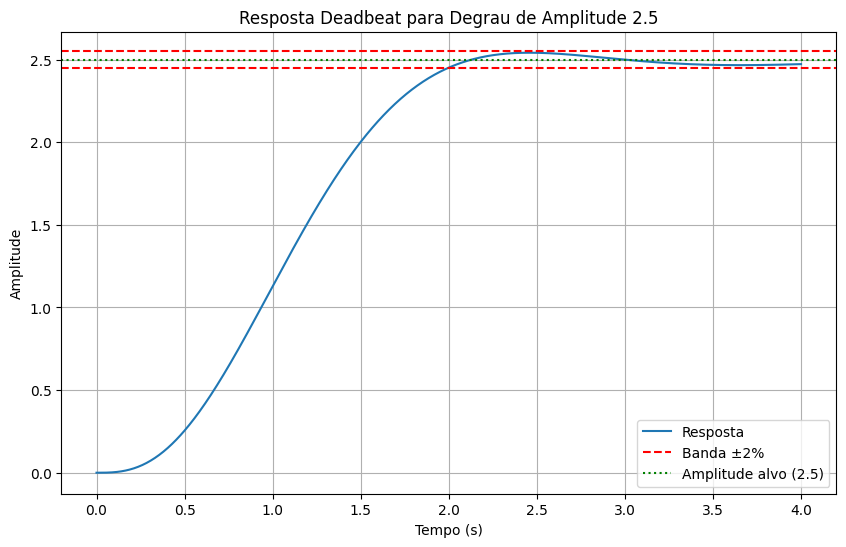

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

a = 2.5
deadbeat_coeffs = {'a': 1.90, 'b': 2.20}
Ts = 2.0

wn = 4.04 / Ts

desired_den = [1, deadbeat_coeffs['a']*wn, deadbeat_coeffs['b']*wn**2, wn**3]

p = desired_den[1] - 1
K = desired_den[2] - p
z = desired_den[3] / K

G = ct.tf([K], [1, 1, 0])
Gc = ct.tf([1, z], [1, p])
Gp = ct.tf([a*z], [1, z])

L = ct.series(Gc, G)
T = ct.feedback(L, 1)
T_scaled = ct.series(Gp, T)

t, y = ct.step_response(T_scaled, T=np.linspace(0, Ts*2, 1000))

def calc_metrics(t, y, a):
    y_ss = a
    idx_10 = np.argmax(y >= 0.1*a)
    idx_90 = np.argmax(y >= 0.9*a)
    Tr = t[idx_90] - t[idx_10]

    idx_ts = np.argmax((y <= 0.98*a) | (y >= 1.02*a))
    Ts_actual = t[idx_ts] if idx_ts != 0 else t[-1]

    OS = (np.max(y) - a)/a * 100
    return Tr, Ts_actual, OS

Tr, Ts_actual, OS = calc_metrics(t, y, a)

print(f"Parâmetros para entrada degrau de amplitude {a}:")
print(f"ω_n = {wn:.2f} rad/s")
print(f"K = {K:.2f}, z = {z:.2f}, p = {p:.2f}")
print(f"\nPerformance:")
print(f"Tempo de subida: {Tr:.2f} s")
print(f"Tempo de acomodação: {Ts_actual:.2f} s")
print(f"Sobressinal: {OS:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Resposta')
plt.axhline(a*1.02, color='r', linestyle='--', label='Banda ±2%')
plt.axhline(a*0.98, color='r', linestyle='--')
plt.axhline(a, color='g', linestyle=':', label=f'Amplitude alvo ({a})')
plt.title(f'Resposta Deadbeat para Degrau de Amplitude {a}')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


## 10.12

### As respostas ao degrau e à rampa do sistema de enrolamento de rotor do Exemplo 10.13

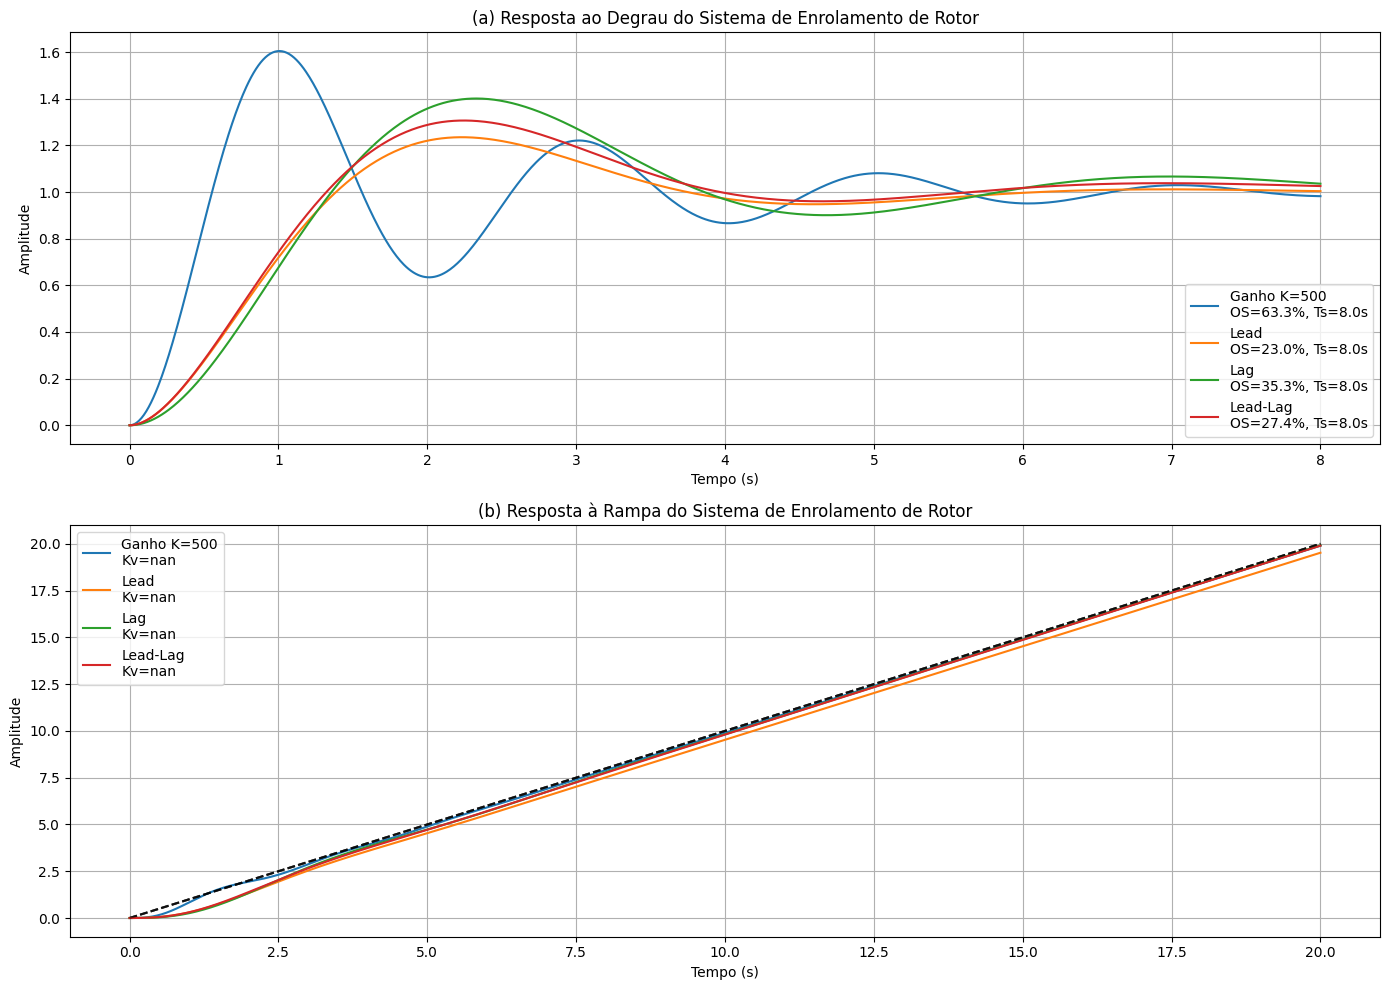

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

num_plant = [1]
den_plant = [50, 50, 0]
G = ct.tf(num_plant, den_plant)

K1 = 500
Gc1 = ct.tf([K1], [1])

Gc2 = ct.tf([191.2*1, 191.2*4], [1, 7.3])

Gc3 = ct.tf([105*1, 105*0.1], [1, 0.0055])

num_lead_lag = np.polymul([191.2, 191.2*4], [1, 0.1])
den_lead_lag = np.polymul([1, 7.3], [1, 0.01])
Gc4 = ct.tf(num_lead_lag, den_lead_lag)

controllers = [(Gc1, 'Ganho K=500'),
               (Gc2, 'Lead'),
               (Gc3, 'Lag'),
               (Gc4, 'Lead-Lag')]

t_step = np.linspace(0, 8, 1000)
t_ramp = np.linspace(0, 20, 1000)

def calc_metrics(t, y):
    y_ss = y[-1]
    OS = (np.max(y) - y_ss)/y_ss * 100

    idx = np.argmax((y > 1.02*y_ss) | (y < 0.98*y_ss))
    Ts = t[idx] if idx != 0 else t[-1]

    return OS, Ts

results = []
for Gc, label in controllers:
    L = ct.series(Gc, G)
    T = ct.feedback(L, 1)

    t_step, y_step = ct.step_response(T, t_step)

    u_ramp = t_ramp
    t_ramp, y_ramp = ct.forced_response(T, t_ramp, u_ramp)

    Kv = ct.dcgain(L * ct.tf([1, 0], [1]))

    OS, Ts = calc_metrics(t_step, y_step)

    results.append({
        'label': label,
        't_step': t_step,
        'y_step': y_step,
        't_ramp': t_ramp,
        'y_ramp': y_ramp,
        'Kv': Kv,
        'OS': OS,
        'Ts': Ts
    })

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
for res in results:
    plt.plot(res['t_step'], res['y_step'],
             label=f"{res['label']}\nOS={res['OS']:.1f}%, Ts={res['Ts']:.1f}s")
plt.title('(a) Resposta ao Degrau do Sistema de Enrolamento de Rotor')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
for res in results:
    plt.plot(res['t_ramp'], res['y_ramp'],
             label=f"{res['label']}\nKv={res['Kv']:.1f}")
    plt.plot(res['t_ramp'], res['t_ramp'], 'k--', alpha=0.5)
plt.title('(b) Resposta à Rampa do Sistema de Enrolamento de Rotor')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Analisar a resposta ao degrau de um sistema compensado

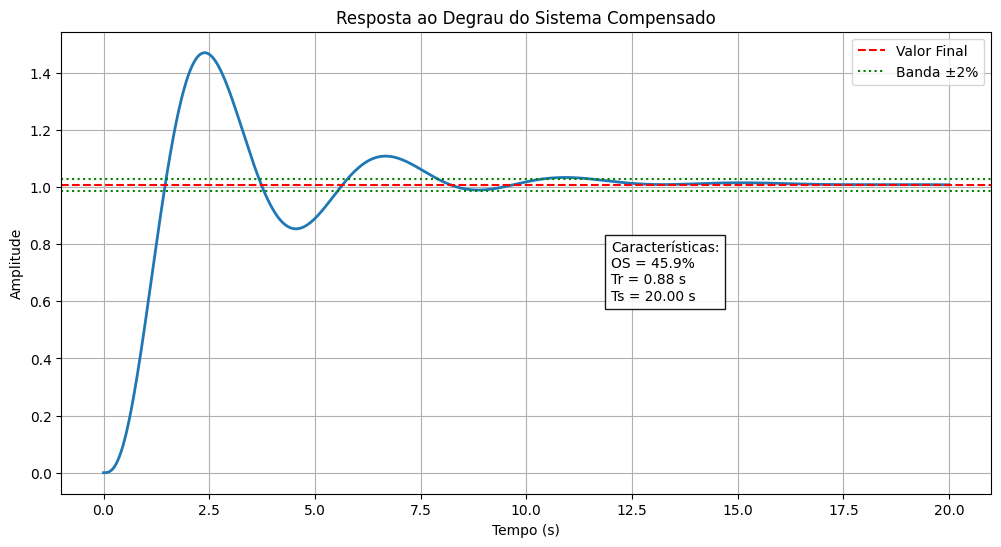

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

planta_num = [1]
planta_den = [1, 5, 6, 0]
compensador_num = [10, 1]
compensador_den = [1, 0.01]

G = ct.tf(planta_num, planta_den)
Gc = ct.tf(compensador_num, compensador_den)

L = ct.series(Gc, G)
T = ct.feedback(L, 1)

t, y = ct.step_response(T, T=np.linspace(0, 20, 1000))  # Tempo aumentado

def calcular_metricas(t, y):
    y_ss = y[-1]
    OS = (np.max(y) - y_ss)/y_ss * 100 if y_ss != 0 else 0

    idx_10 = np.argmax(y >= 0.1*y_ss)
    idx_90 = np.argmax(y >= 0.9*y_ss)
    Tr = t[idx_90] - t[idx_10] if idx_90 > idx_10 else 0

    within_band = (y >= 0.98*y_ss) & (y <= 1.02*y_ss)
    idx_ts = np.where(within_band)[0][-1] if np.any(within_band) else 0
    Ts = t[idx_ts]

    return OS, Tr, Ts, y_ss

OS, Tr, Ts, y_ss = calcular_metricas(t, y)  # Recebe y_ss

plt.figure(figsize=(12, 6))
plt.plot(t, y, linewidth=2)
plt.title('Resposta ao Degrau do Sistema Compensado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.axhline(y_ss, color='r', linestyle='--', label='Valor Final')
plt.axhline(1.02*y_ss, color='g', linestyle=':', label='Banda ±2%')
plt.axhline(0.98*y_ss, color='g', linestyle=':')

plt.text(0.6*max(t), 0.6*y_ss,
         f'''Características:
OS = {OS:.1f}%
Tr = {Tr:.2f} s
Ts = {Ts:.2f} s''',
         bbox=dict(facecolor='white', alpha=0.9))

plt.legend()
plt.show()

## 10.13

### Resposta transitória para controlador de ganho simples

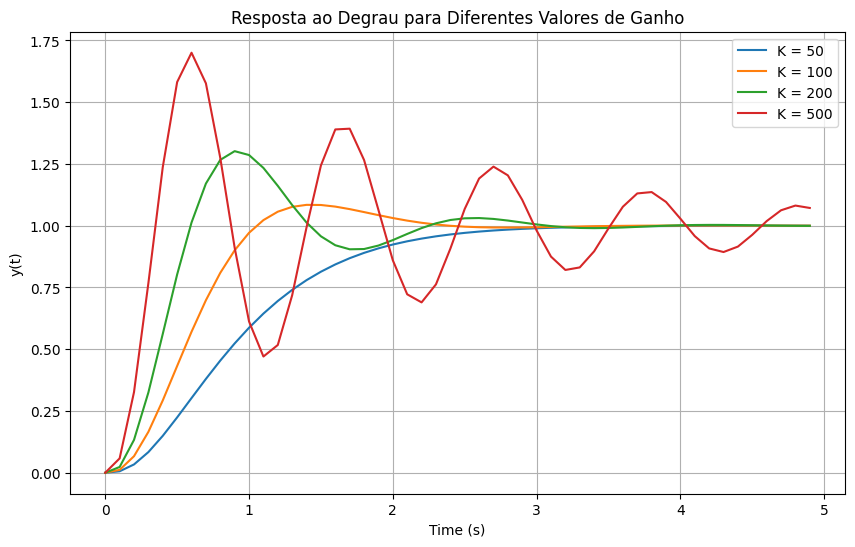

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K = [50, 100, 200, 500]

numg = [1]
deng = [1, 15, 50, 0]
sysg = ct.tf(numg, deng)

t = np.arange(0, 5, 0.1)

responses = []

for k in K:
    sys = ct.feedback(k * sysg)
    t, y = ct.step_response(sys, t)
    responses.append(y)

plt.figure(figsize=(10, 6))
for i, k in enumerate(K):
    plt.plot(t, responses[i], label=f'K = {k}')

plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau para Diferentes Valores de Ganho')
plt.grid(True)
plt.legend()
plt.show()

### Diagrama de Bode

/usr/local/lib/python3.11/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


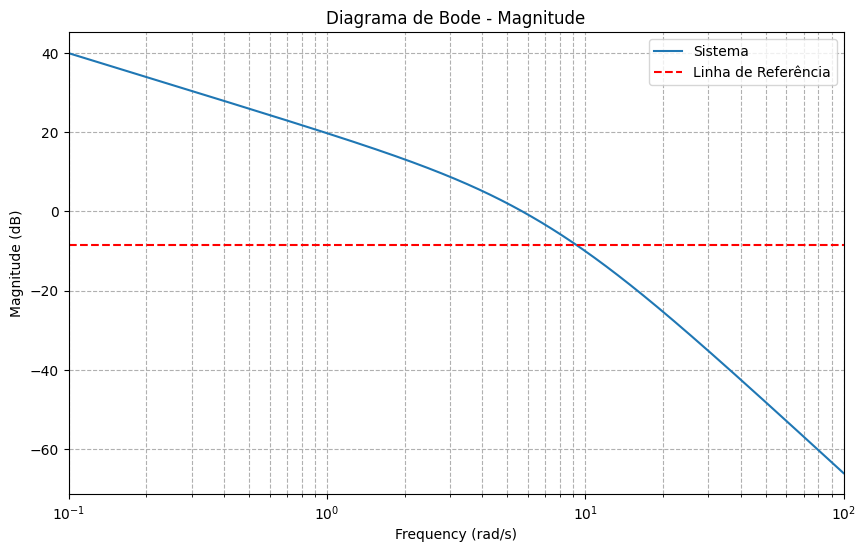

Margem de Ganho: 1.50
Margem de Fase: 11.42°
Frequência de Margem de Ganho: 7.07 rad/s
Frequência de Margem de Fase: 5.72 rad/s
Alpha calculado: 6.99


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K = 500

numg = [1]
deng = [1, 15, 50, 0]
sysg = ct.tf(numg, deng)

sys = K * sysg

gm, pm, sm, wg, wp, ws = ct.stability_margins(sys)

phi = np.deg2rad(60 - pm)
alpha = (1 + np.sin(phi)) / (1 - np.sin(phi))

frequencies = np.logspace(-1, 2, 1000)
mag, phase, w = ct.bode(sys, omega=frequencies, dB=True, plot=False)

M = -10 * np.log10(alpha) * np.ones_like(w)

plt.figure(figsize=(10, 6))
plt.semilogx(w, 20 * np.log10(mag))
plt.semilogx(w, M, 'r--')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.title('Diagrama de Bode - Magnitude')
plt.grid(True, which='both', linestyle='--')
plt.legend(['Sistema', 'Linha de Referência'])
plt.xlim([np.min(w), np.max(w)])
plt.show()

print(f"Margem de Ganho: {gm:.2f}")
print(f"Margem de Fase: {pm:.2f}°")
print(f"Frequência de Margem de Ganho: {wg:.2f} rad/s")
print(f"Frequência de Margem de Fase: {wp:.2f} rad/s")
print(f"Alpha calculado: {alpha:.2f}")

### Compensador de avanço de fase, diagrama de bode

/tmp/ipython-input-11-2317837052.py:18: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  ct.bode_plot(sys, dB=True, Hz=False, margins=True)


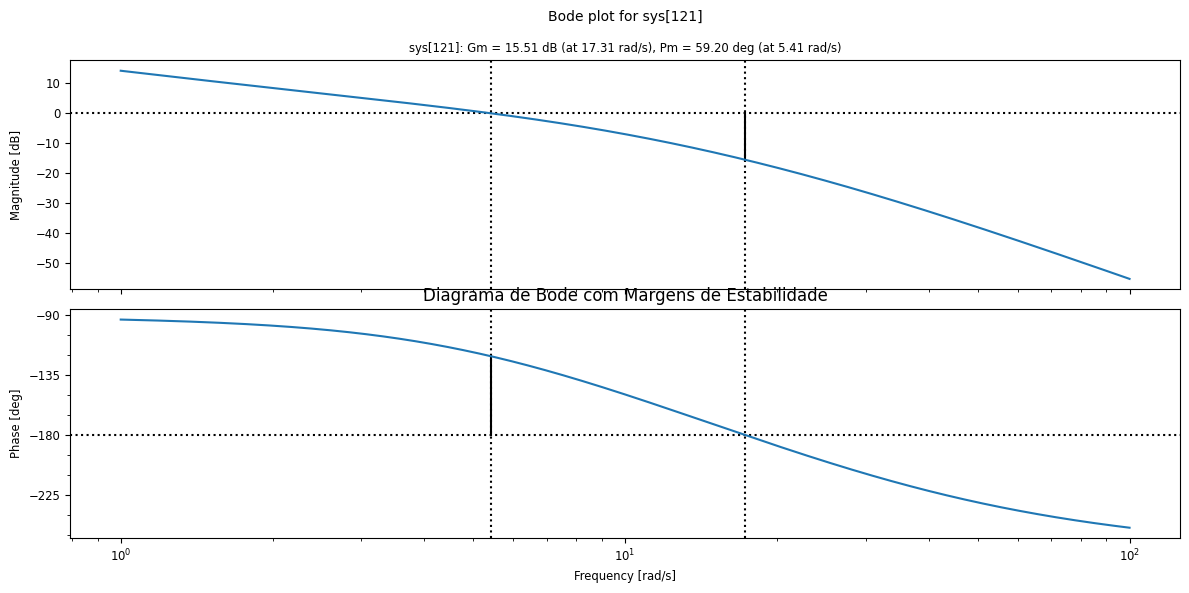

Margem de Ganho: 5.96
Margem de Fase: 59.20°
Frequência de Margem de Ganho: 17.31 rad/s
Frequência de Margem de Fase: 5.41 rad/s


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K = 1800

numg = [1]
deng = [1, 15, 50, 0]
sysg = ct.tf(numg, deng)

numgc = K * np.array([1, 3.5])
dengc = [1, 25]
sysgc = ct.tf(numgc, dengc)

sys = ct.series(sysgc, sysg)

plt.figure(figsize=(12, 6))
ct.bode_plot(sys, dB=True, Hz=False, margins=True)
plt.title('Diagrama de Bode com Margens de Estabilidade')
plt.show()

gm, pm, sm, wg, wp, ws = ct.stability_margins(sys)
print(f"Margem de Ganho: {gm:.2f}")
print(f"Margem de Fase: {pm:.2f}°")
print(f"Frequência de Margem de Ganho: {wg:.2f} rad/s")
print(f"Frequência de Margem de Fase: {wp:.2f} rad/s")

### Compensador de avanço de fase, resposta ao degrau

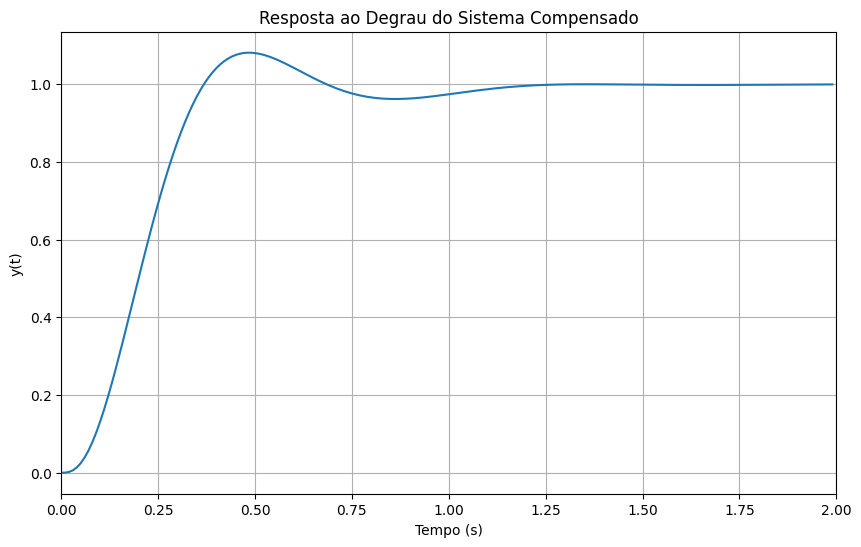

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K = 1800

numg = [1]
deng = [1, 15, 50, 0]
sysg = ct.tf(numg, deng)

numgc = K * np.array([1, 3.5])
dengc = [1, 25]
sysgc = ct.tf(numgc, dengc)

syso = ct.series(sysgc, sysg)
sys = ct.feedback(syso)

t = np.arange(0, 2, 0.01)
t, y = ct.step_response(sys, t)

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema Compensado')
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.grid(True)
plt.xlim([0, 2])
plt.show()

### Compensador Phase-Lag (Atraso de fase), raiz não compensada

/tmp/ipython-input-13-397657367.py:20: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt(wn**2 - xc**2)


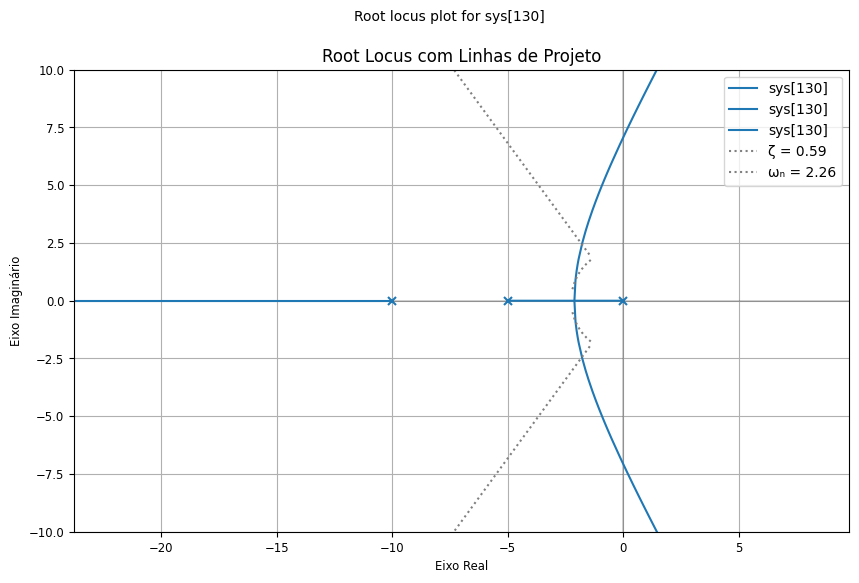

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

numg = [1]
deng = [1, 15, 50, 0]
sysg = ct.tf(numg, deng)

zeta = 0.5912
wn = 2.2555

plt.figure(figsize=(10, 6))

ct.root_locus(sysg, grid=False)

x = np.arange(-10, -zeta*wn, 0.1)
y = -(np.sqrt(1 - zeta**2)/zeta) * x

xc = np.arange(-10, -zeta*wn, 0.1)
c = np.sqrt(wn**2 - xc**2)

valid = ~np.isnan(c)

plt.plot(x, y, ':', color='gray', label='ζ = 0.59')
plt.plot(x, -y, ':', color='gray')
plt.plot(xc[valid], c[valid], ':', color='gray', label='ωₙ = 2.26')
plt.plot(xc[valid], -c[valid], ':', color='gray')

plt.axis([-15, 1, -10, 10])
plt.title('Root Locus com Linhas de Projeto')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.legend()
plt.grid(True)
plt.show()

### Compensador Phase-Lag (Atraso de fase), raiz compensada

/tmp/ipython-input-14-3309978551.py:26: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt(wn**2 - xc**2)


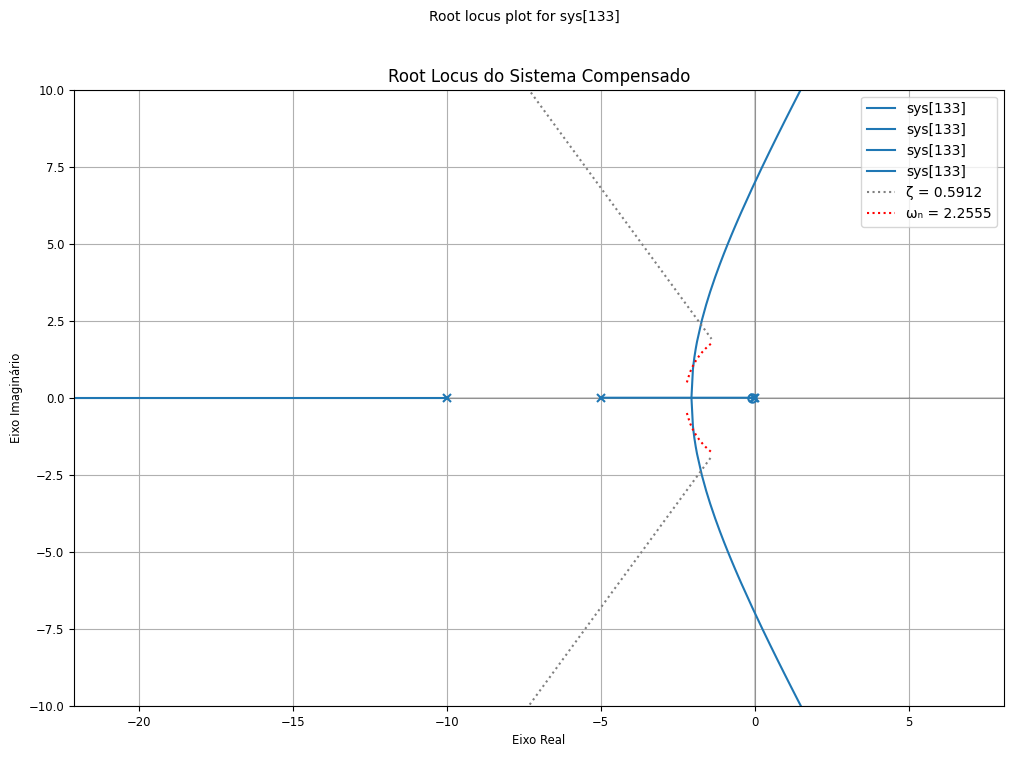

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

numg = [1]
deng = [1, 15, 50, 0]
sysg = ct.tf(numg, deng)

numgc = [1, 0.1]
dengc = [1, 0.01]
sysgc = ct.tf(numgc, dengc)

sys = ct.series(sysgc, sysg)

zeta = 0.5912
wn = 2.2555

plt.figure(figsize=(12, 8))

ct.root_locus(sys, grid=False)

x = np.arange(-10, -zeta*wn, 0.1)
y = -(np.sqrt(1 - zeta**2)/zeta) * x

xc = np.arange(-10, -zeta*wn, 0.1)
c = np.sqrt(wn**2 - xc**2)

valid = ~np.isnan(c)

plt.plot(x, y, ':', color='gray', label=f'ζ = {zeta}')
plt.plot(x, -y, ':', color='gray')
plt.plot(xc[valid], c[valid], ':', color='red', label=f'ωₙ = {wn}')
plt.plot(xc[valid], -c[valid], ':', color='red')

plt.axis([-15, 1, -10, 10])
plt.title('Root Locus do Sistema Compensado')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.legend()
plt.grid(True)
plt.show()

### Compensador Phase-Lag (Atraso de fase), resposta ao degrau

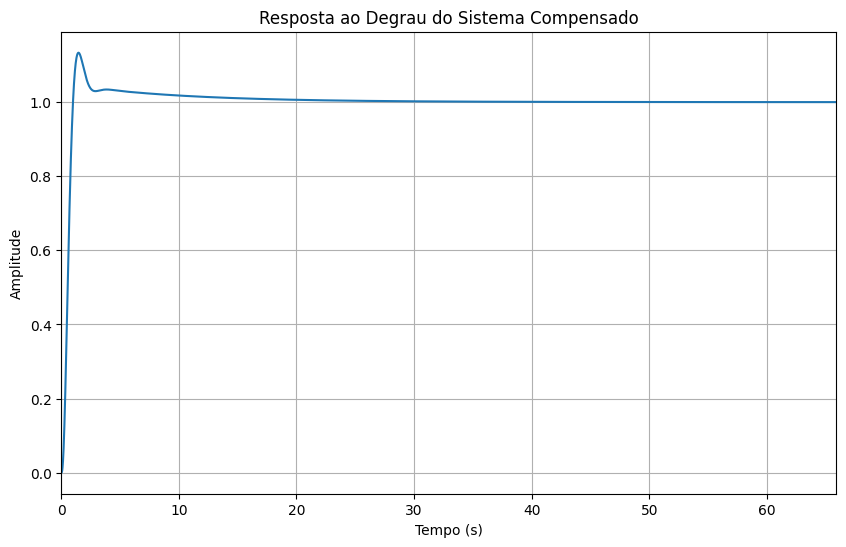

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

K = 100

numg = [1]
deng = [1, 15, 50, 0]
sysg = ct.tf(numg, deng)

numgc = K * np.array([1, 0.1])
dengc = [1, 0.01]
sysgc = ct.tf(numgc, dengc)

syso = ct.series(sysgc, sysg)
sys = ct.feedback(syso, 1)

t, y = ct.step_response(sys, T=None)

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema Compensado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim([0, np.max(t)])
plt.show()